# About Dataset

This dataset captures comprehensive metrics and demographics related to player behavior in online gaming environments. It includes variables such as player demographics, game-specific details, engagement metrics, and a target variable reflecting player retention.
This dataset is suitable for exploring patterns in online gaming behavior, developing machine learning models for player engagement prediction, and conducting research in gaming analytics.

# COLUMN DESCRIPTION

* **PlayerID**: Unique identifier for each player.
  
* **Age**: Age of the player.

* **Gender**: Gender of the player.
  
* **Location**: Geographic location of the player.

* **GameGenre**: Genre of the game the player is engaged in.

* **PlayTimeHours**: Average hours spent playing per session.

* **InGamePurchases**: Indicates whether the player makes in-game purchases (0 = No, 1 = Yes).

* **GameDifficulty**: Difficulty level of the game.

* **SessionsPerWeek**: Number of gaming sessions per week.

* **AvgSessionDurationMinutes**: Average duration of each gaming session in minutes.


* **PlayerLevel**: Current level of the player in the game.

* **AchievementsUnlocked**: Number of achievements unlocked by the player.

* **EngagementLevel**: Categorized engagement level reflecting player retention ('High', 'Medium', 'Low').

In [19]:
#Importing libraries

import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
import warnings 
warnings.filterwarnings('ignore')

In [20]:
#loading the Dataset

game= pd.read_csv('online_gaming_behavior_dataset.csv')
game.head(2)

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium


In [21]:
game.shape

(40034, 13)

In [22]:
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

In [23]:
game.set_index('PlayerID', inplace=True)

In [24]:
game.duplicated()

PlayerID
9000     False
9001     False
9002     False
9003     False
9004     False
         ...  
49029    False
49030    False
49031    False
49032    False
49033    False
Length: 40034, dtype: bool

**INFERENCE** 
* It is a large dataset with 40034 records, 13 attributes
* There are no null values in the data
* There are 7 quantitative and 5 qualitative features.
* There are no duplicates in the dataset

## DESCRIPTIVE ANALYSIS

In [25]:
game.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,40034.0,31.992531,10.043227,15.000000,23.000000,32.000000,41.000000,49.000000
PlayTimeHours,40034.0,12.024365,6.914638,0.000115,6.067501,12.008002,17.963831,23.999592
InGamePurchases,40034.0,0.200854,0.400644,0.000000,0.000000,0.000000,0.000000,1.000000
SessionsPerWeek,40034.0,9.471774,5.763667,0.000000,4.000000,9.000000,14.000000,19.000000
AvgSessionDurationMinutes,40034.0,94.792252,49.011375,10.000000,52.000000,95.000000,137.000000,179.000000
PlayerLevel,40034.0,49.655568,28.588379,1.000000,25.000000,49.000000,74.000000,99.000000
AchievementsUnlocked,40034.0,24.526477,14.430726,0.000000,12.000000,25.000000,37.000000,49.000000


**INFERENCE**
* Minimum age is 15 years while maximum age is 49 years.
* Average playtimehours: ~12 hours

In [26]:
game.describe(exclude=np.number).T

,count,unique,top,freq
Gender,40034,2,Male,23959
Location,40034,4,USA,16000
GameGenre,40034,5,Sports,8048
GameDifficulty,40034,3,Easy,20015
EngagementLevel,40034,3,Medium,19374


**INFERENCE**
* The players are mostly males.
* Location of the players is mostly USA.
* Sports Genre is the most played.

In [27]:
num_cols= game.select_dtypes(np.number).columns
num_cols

Index(['Age', 'PlayTimeHours', 'InGamePurchases', 'SessionsPerWeek',
       'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked'],
      dtype='object')

In [28]:
cat_cols=game.select_dtypes(object).columns
cat_cols

Index(['Gender', 'Location', 'GameGenre', 'GameDifficulty', 'EngagementLevel'], dtype='object')

## VISUAL ANALYSIS

### UNIVARIATE ANALYSIS

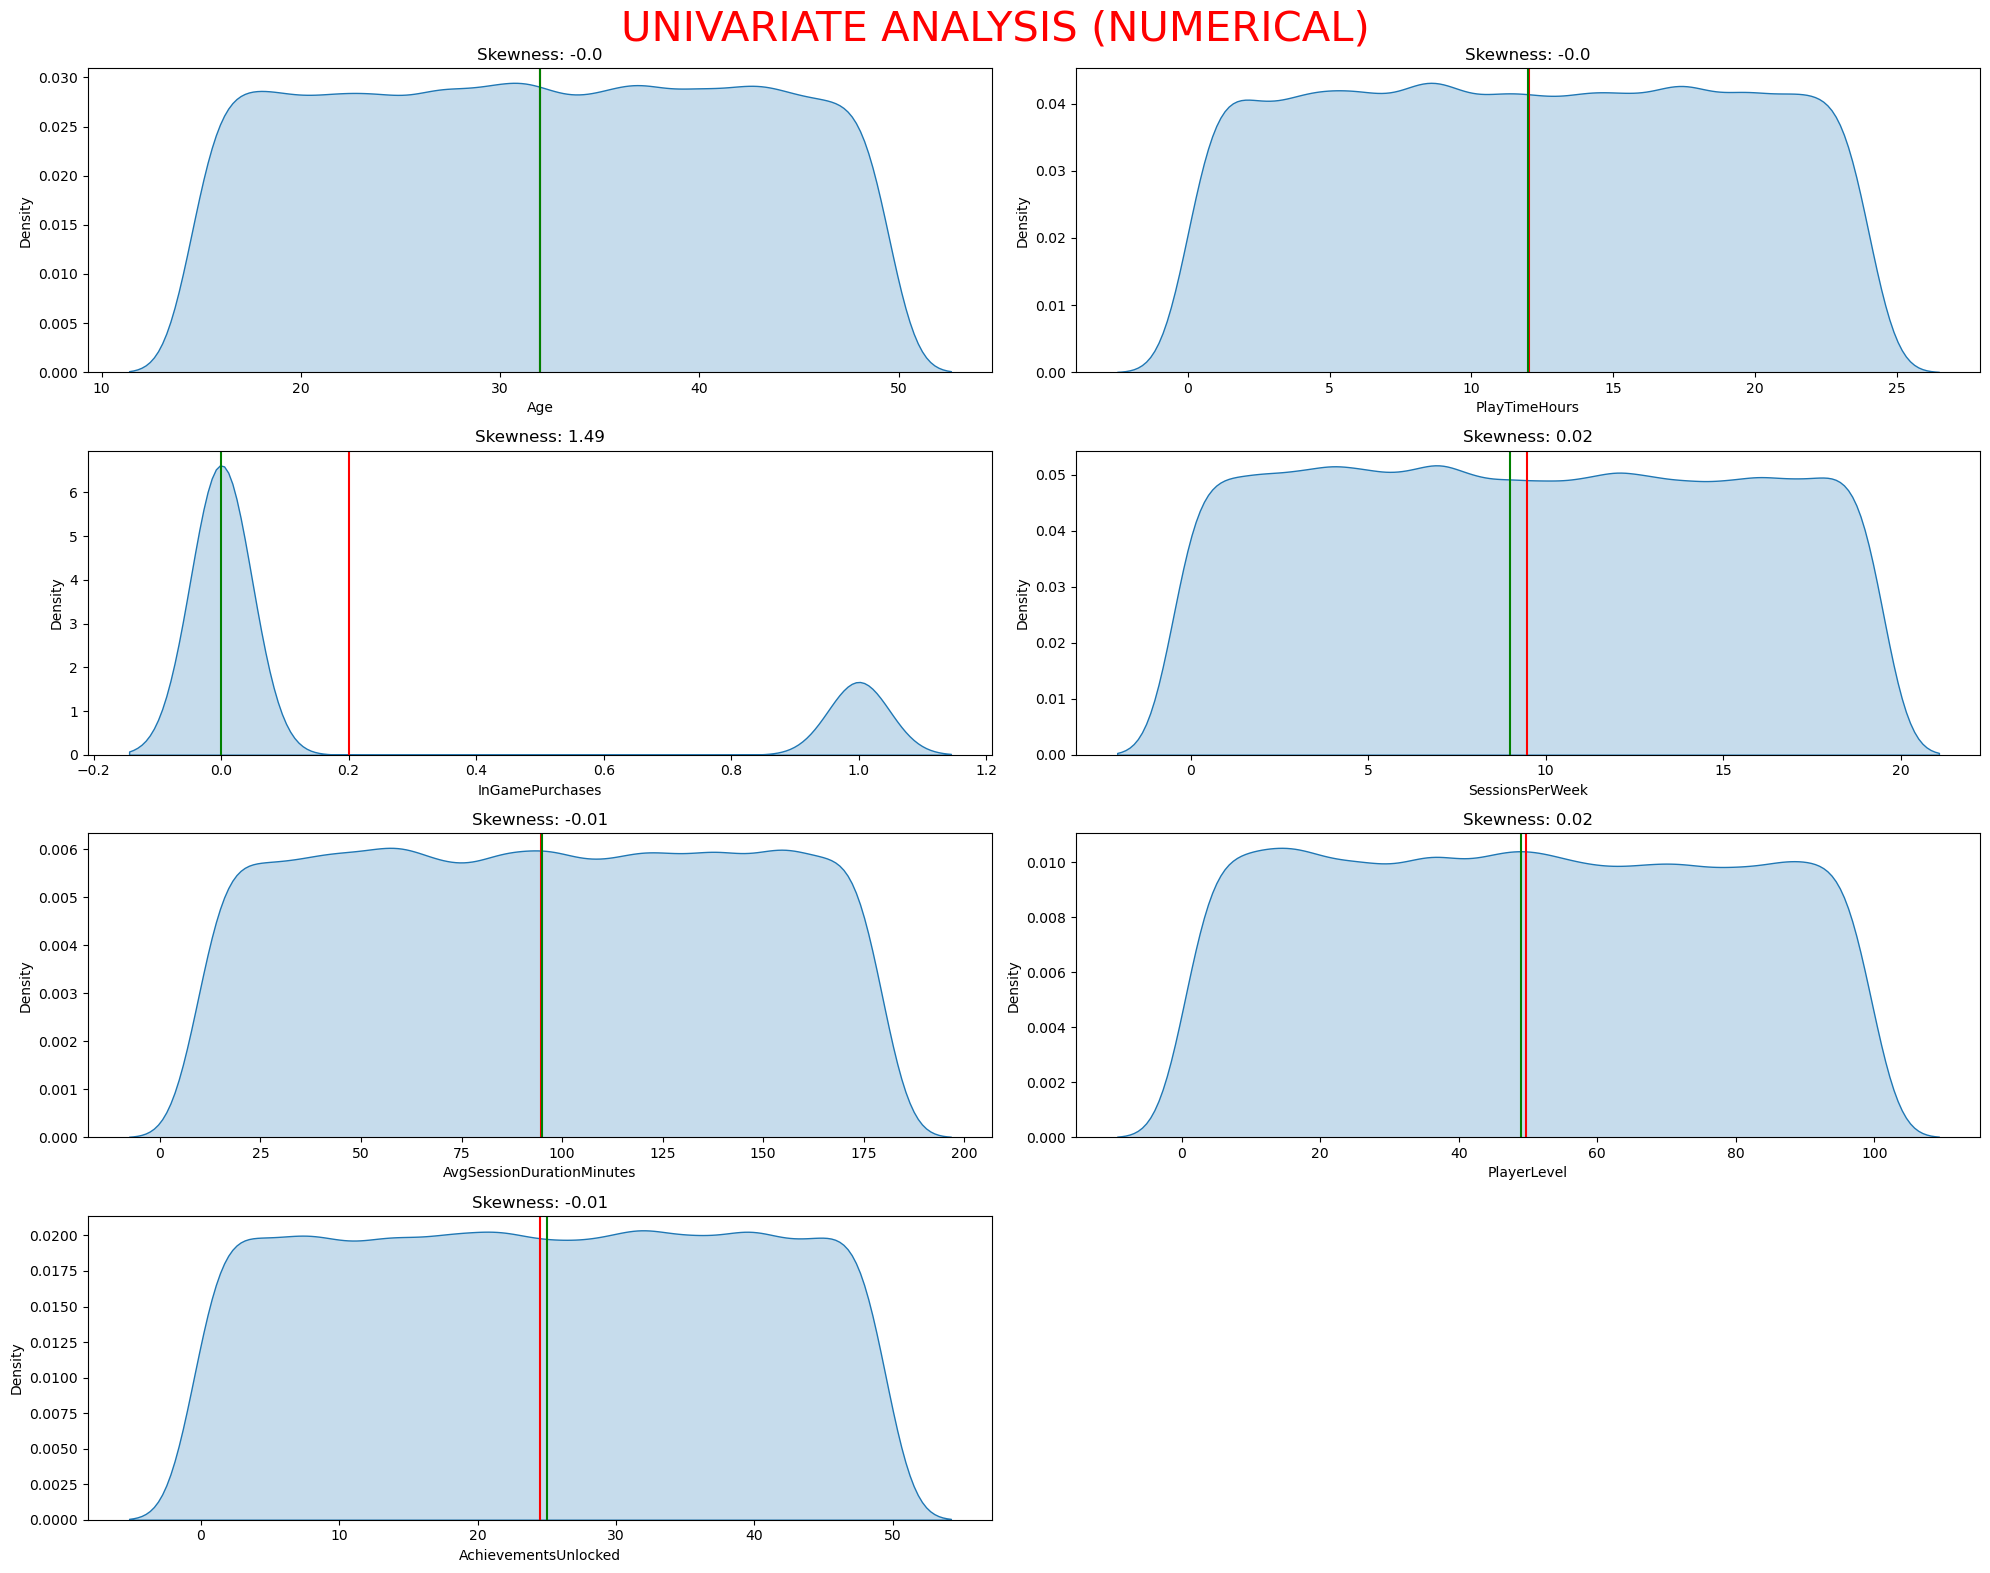

In [29]:
plt.figure(figsize= (20,16))
plt.suptitle('UNIVARIATE ANALYSIS (NUMERICAL)',size=30, color='red')

t=1
for i in num_cols:
    plt.subplot(4,2,t)
    sns.kdeplot(game, x=i, fill=True)
    sk= game[i].skew()
    plt.title(f'Skewness: {round(sk,2)}')
    plt.axvline(game[i].mean(), label = 'MEAN', color = 'red')
    plt.axvline(game[i].median(), label = 'MEDIAN', color = 'green')
    t+=1

plt.tight_layout()
plt.show()

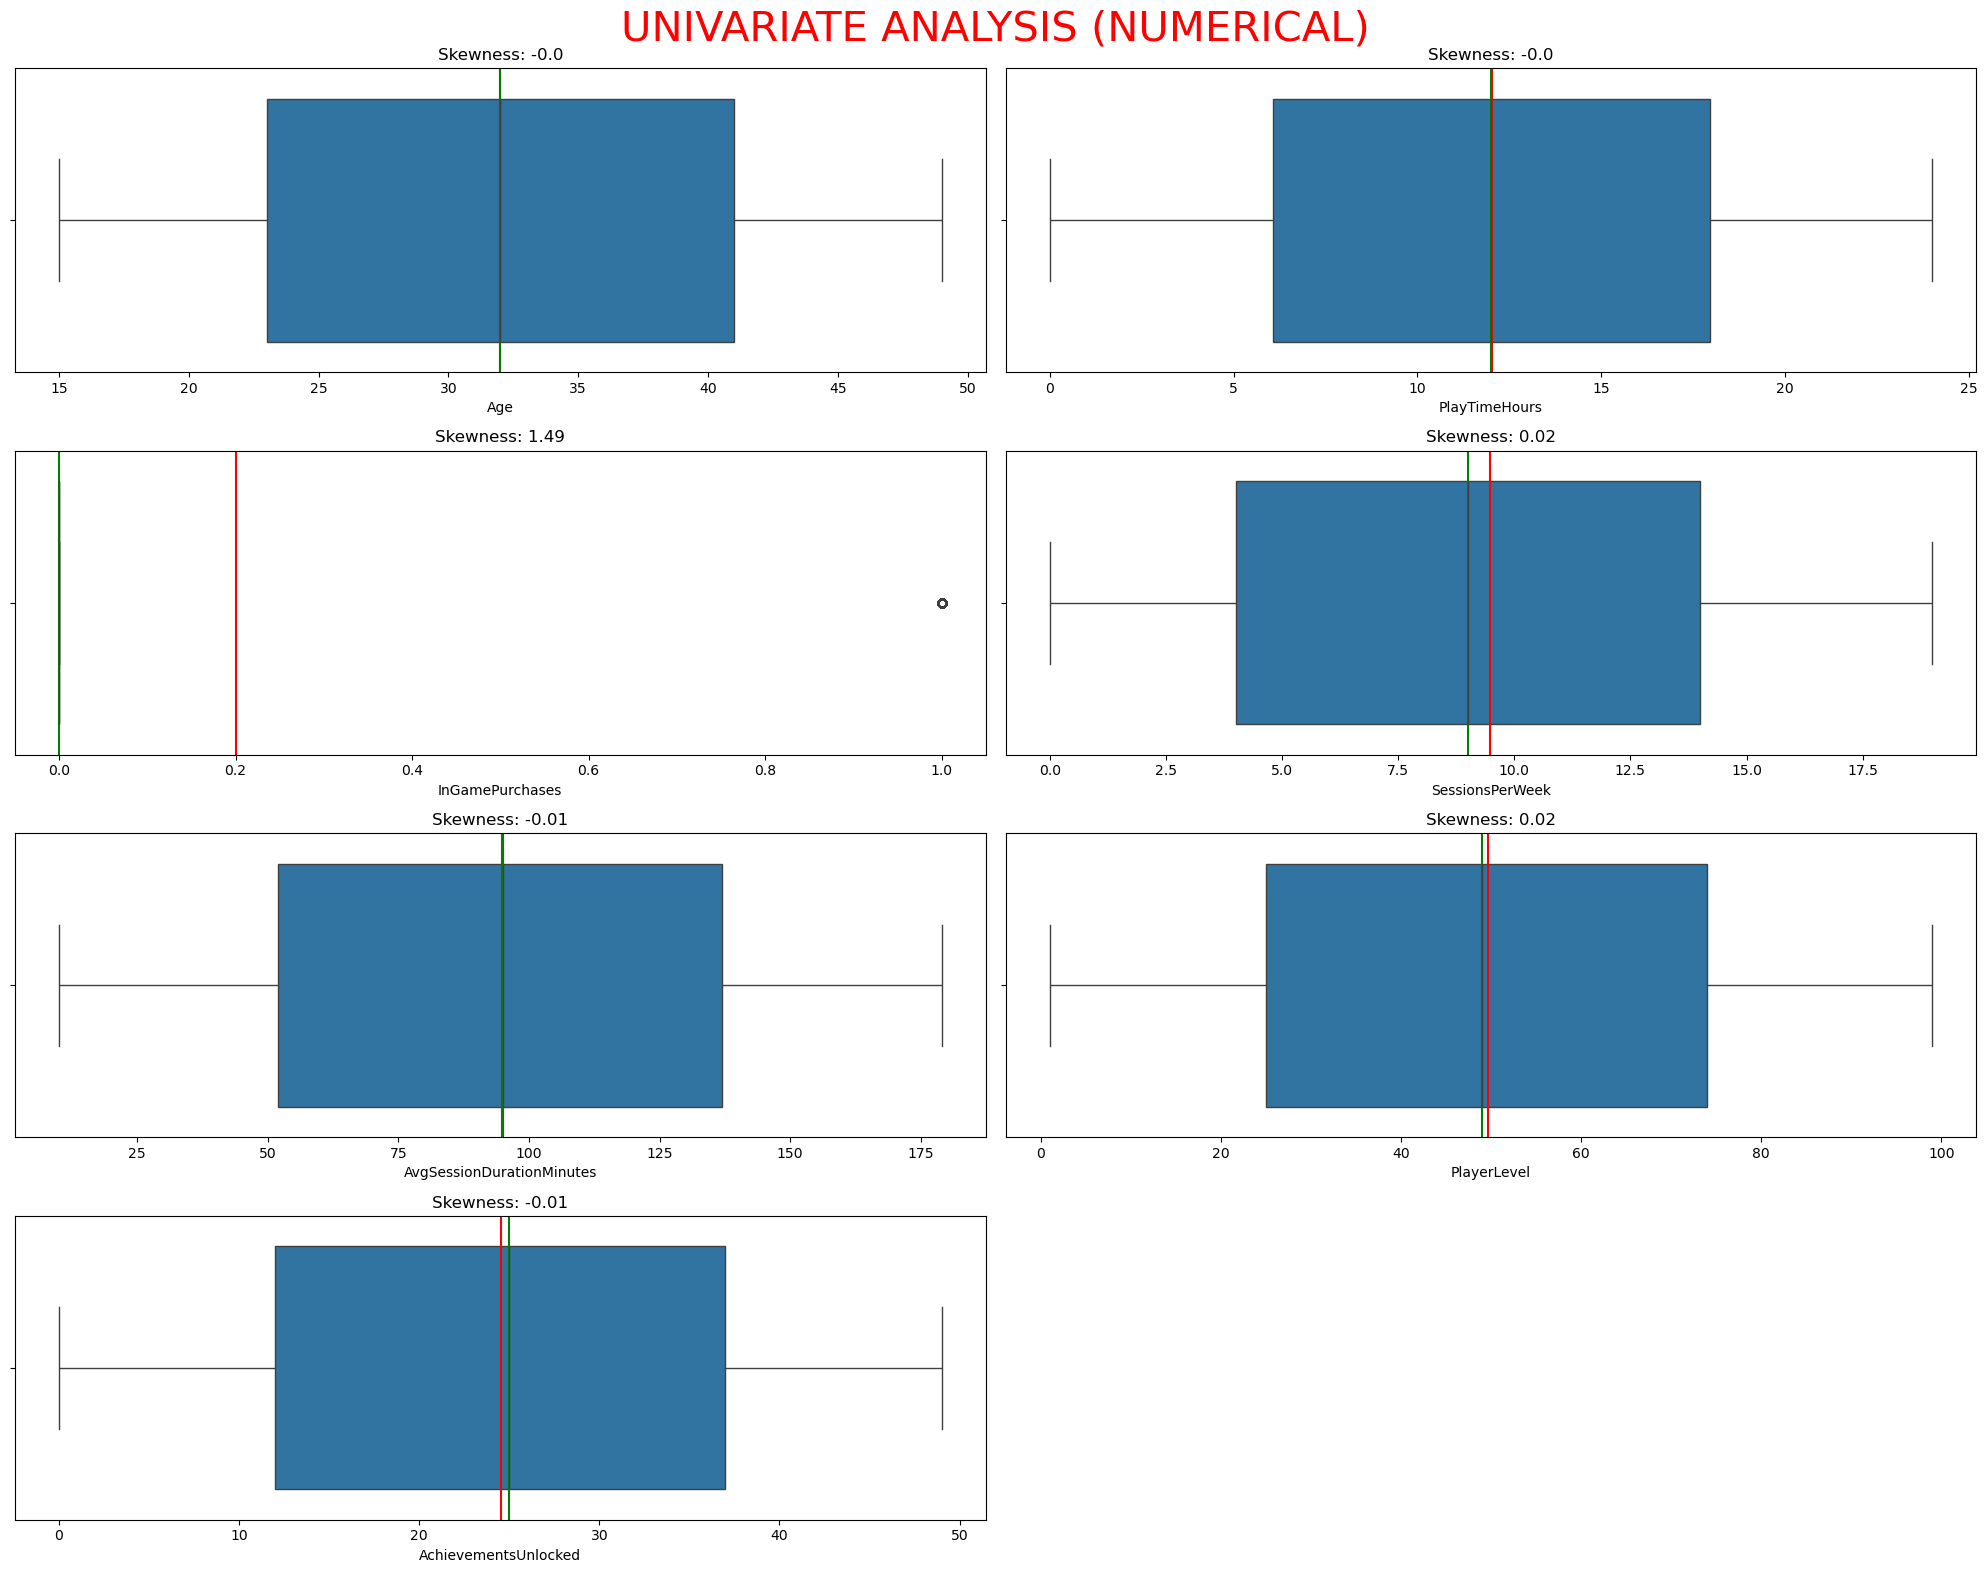

In [30]:
#VIUALIZING OUTLIERS
plt.figure(figsize= (20,16))
plt.suptitle('UNIVARIATE ANALYSIS (NUMERICAL)',size=30, color='red')

t=1
for i in num_cols:
    plt.subplot(4,2,t)
    sns.boxplot(game, x=i)
    sk= game[i].skew()
    plt.title(f'Skewness: {round(sk,2)}')
    plt.axvline(game[i].mean(), label = 'MEAN', color = 'red')
    plt.axvline(game[i].median(), label = 'MEDIAN', color = 'green')
    t+=1

plt.tight_layout()
plt.show()

**INFERENCE**

* The data in the numerical columns is normally distributed.
* There are not outliers in the dataset

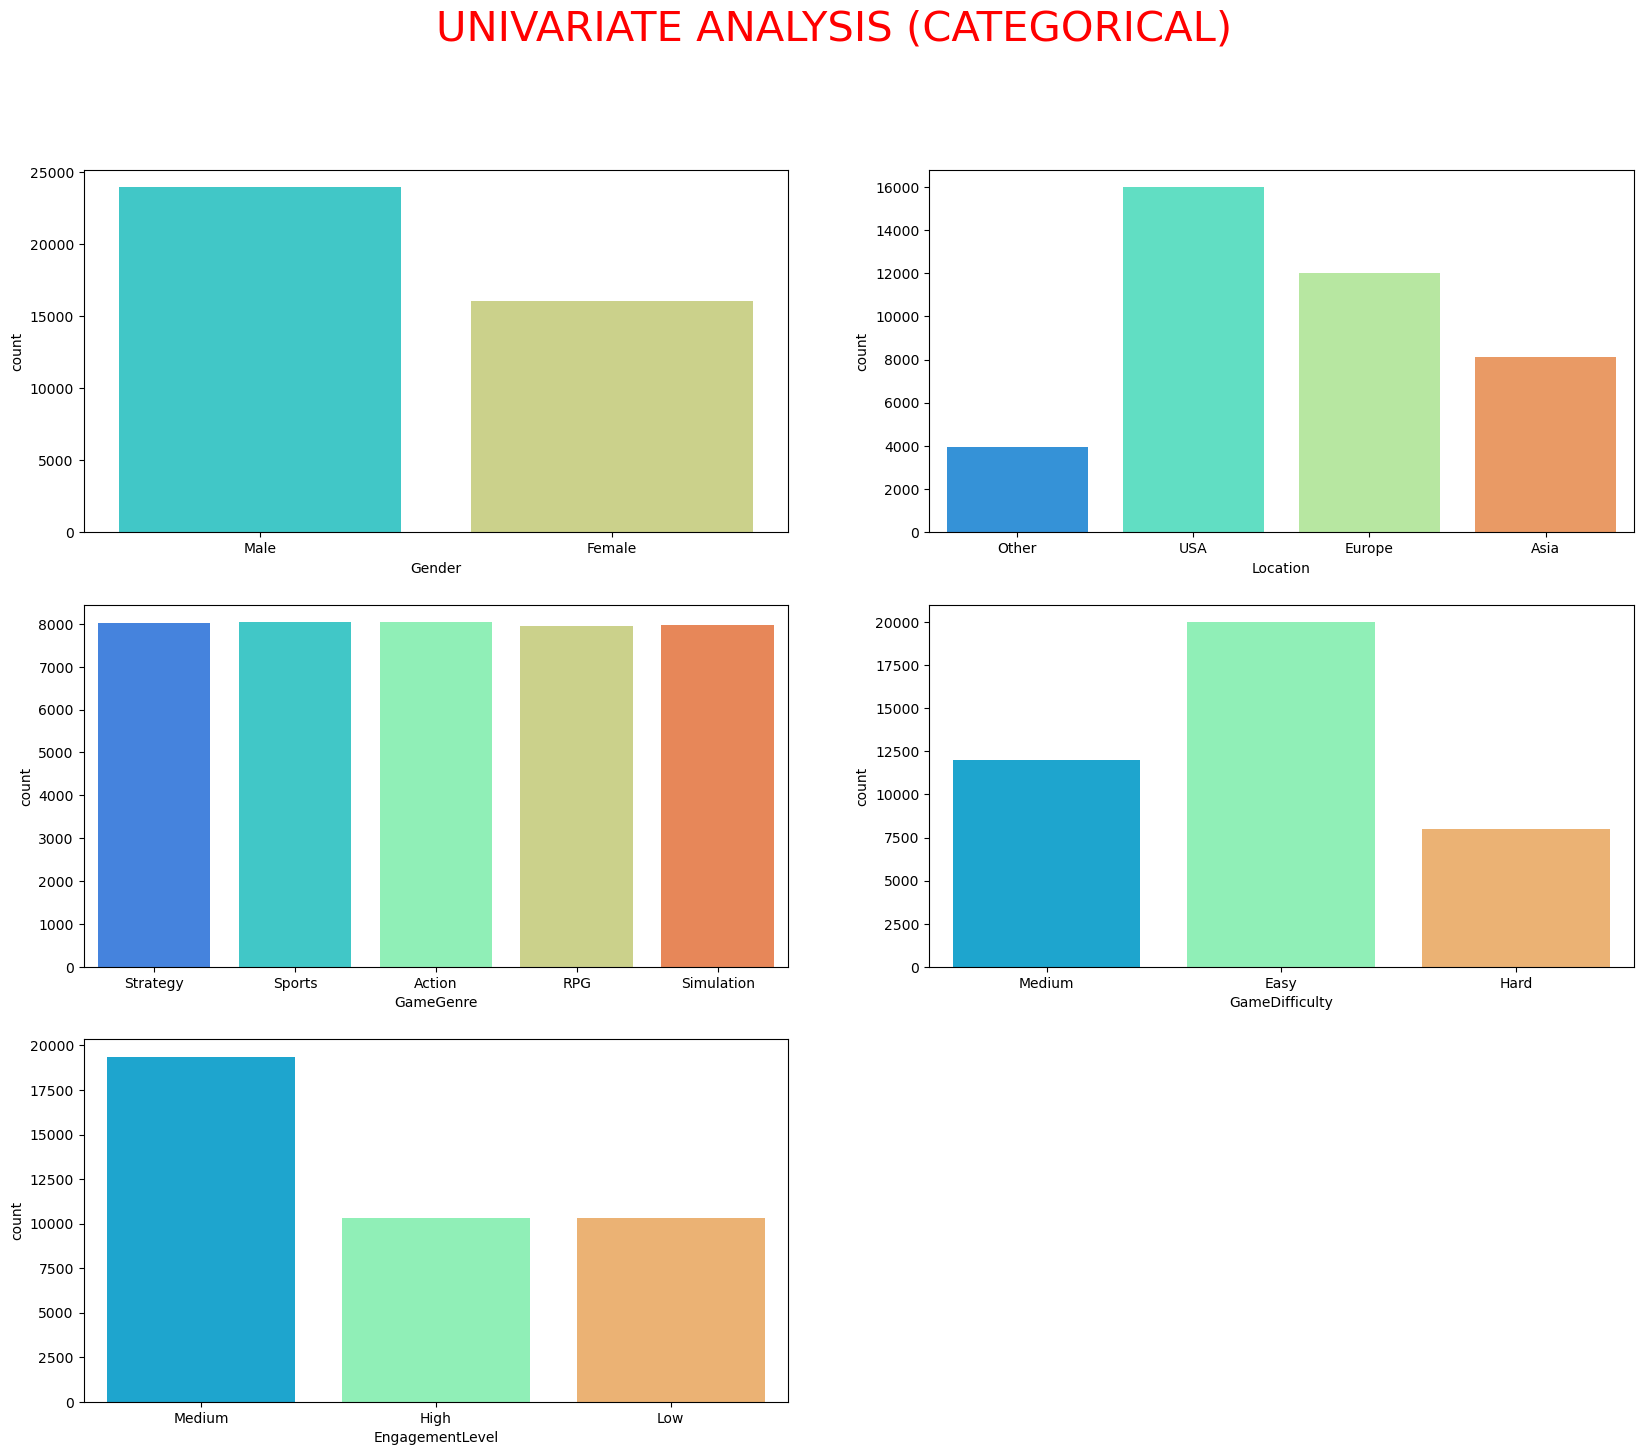

In [31]:
plt.figure(figsize= (20,16))
plt.suptitle('UNIVARIATE ANALYSIS (CATEGORICAL)',size=30, color='red')
t=1
for i in cat_cols:
    plt.subplot(3,2,t)
    sns.countplot(game, x=i, palette='rainbow')
    t+=1

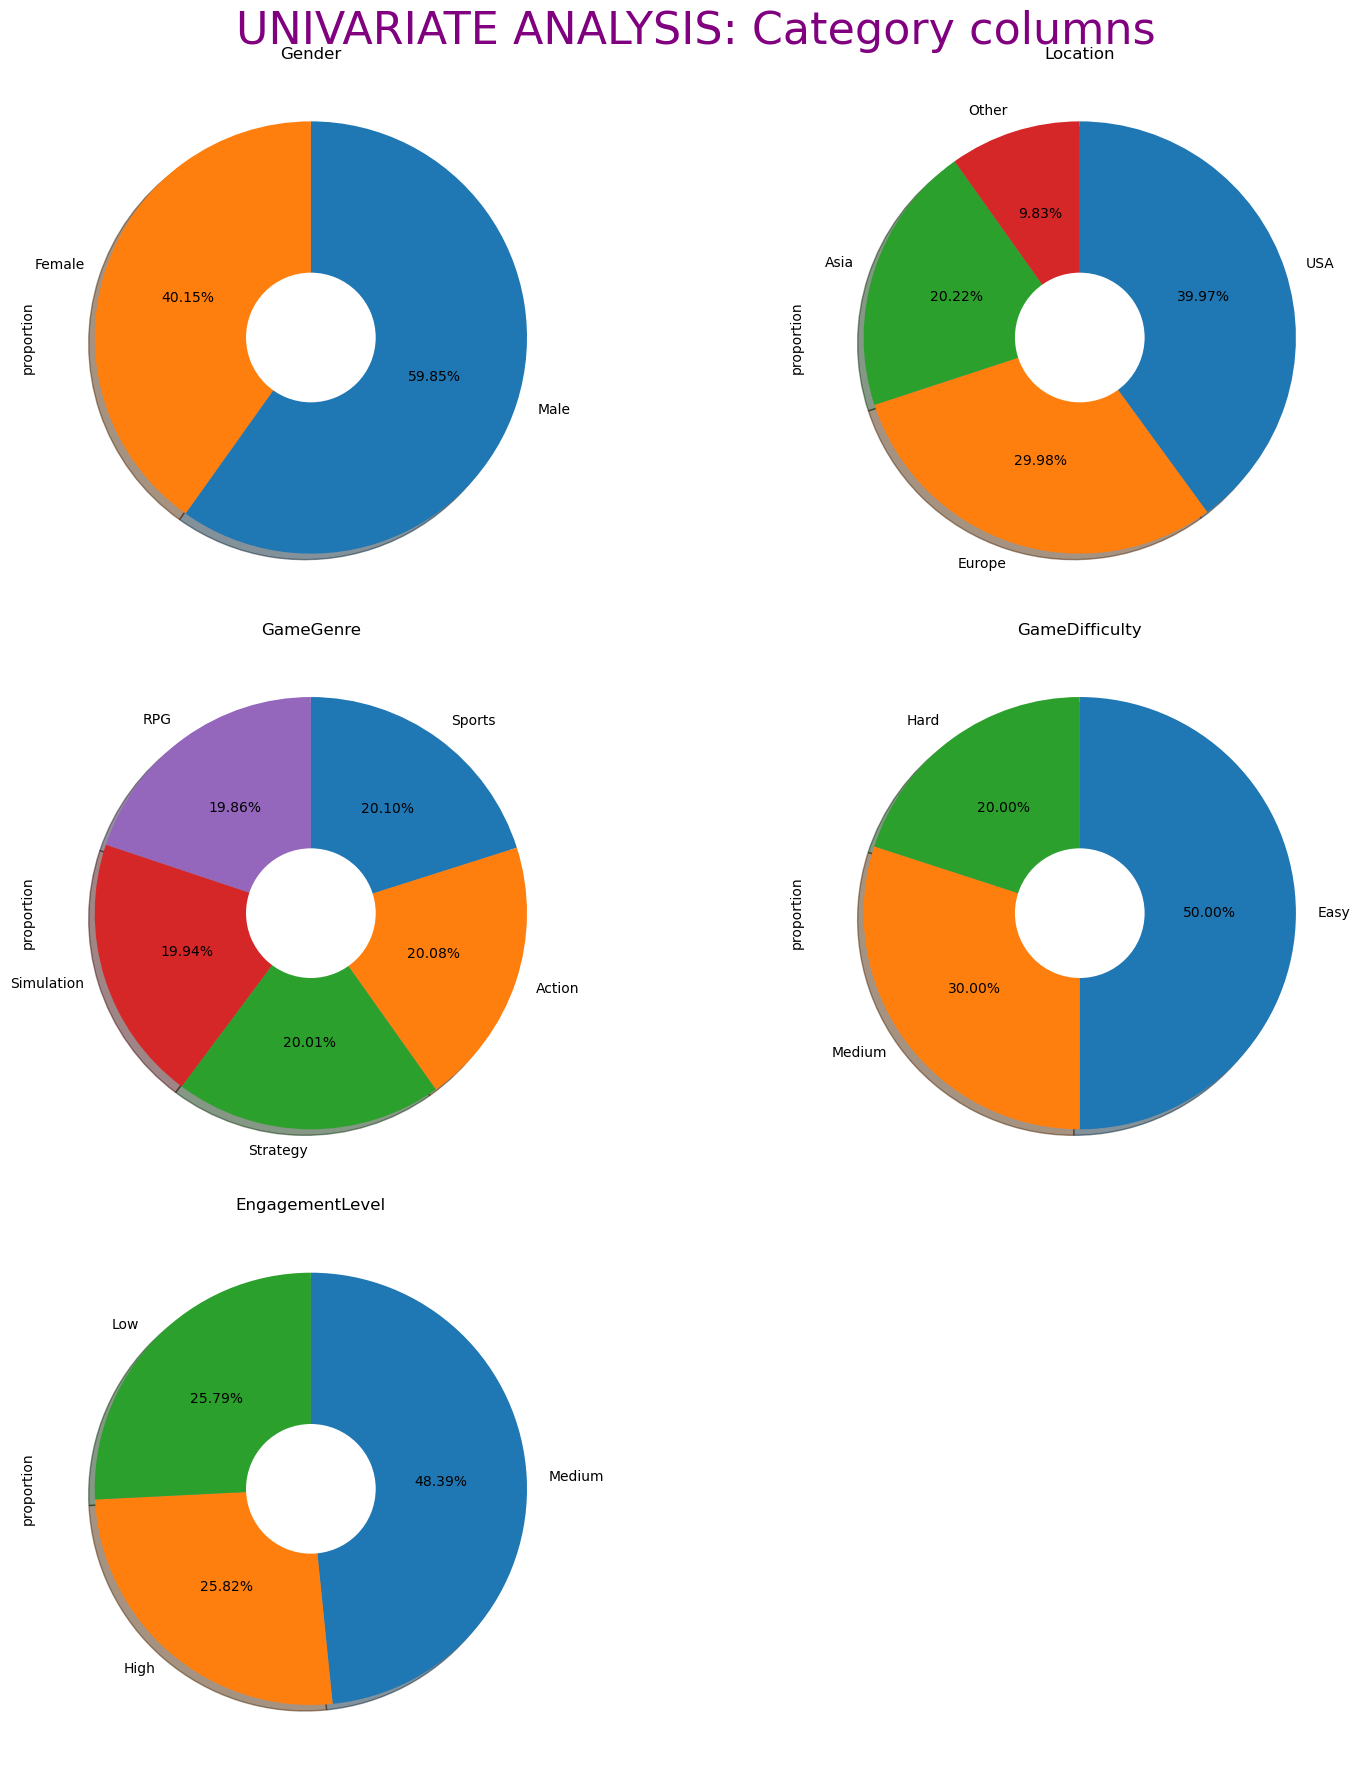

In [32]:
t=1
plt.figure(figsize=(16,18))
plt.suptitle('UNIVARIATE ANALYSIS: Category columns',color='purple',size=32)
for i in cat_cols:
    plt.subplot(3,2,t)
    game[i].value_counts(normalize=True).plot(kind='pie',counterclock=False,autopct='%.2f%%' ,startangle=90,shadow=True)
    plt.pie([1],colors=['w'],radius=0.3)
    plt.title(i)
    t+=1
plt.tight_layout()
plt.show()

**INFERENCE**
* There is a notable male predominance among players, with nearly 60% identifying as male. This gender disparity suggests that marketing campaigns and game features could be optimized to better engage female players. Strategies might include developing female-centric narratives, characters, or community events that resonate with female gamers.
  
* The USA has the highest representation among players, followed by Europe and Asia. This geographical distribution indicates that marketing efforts should be tailored to different regional preferences and cultural contexts.

* Game genres are fairly evenly distributed among players, with Sports and Action being the most popular.

* A significant portion of players prefers easier game settings (50%), indicating a trend toward casual gaming experiences.

### BIVARIATE ANALYSIS

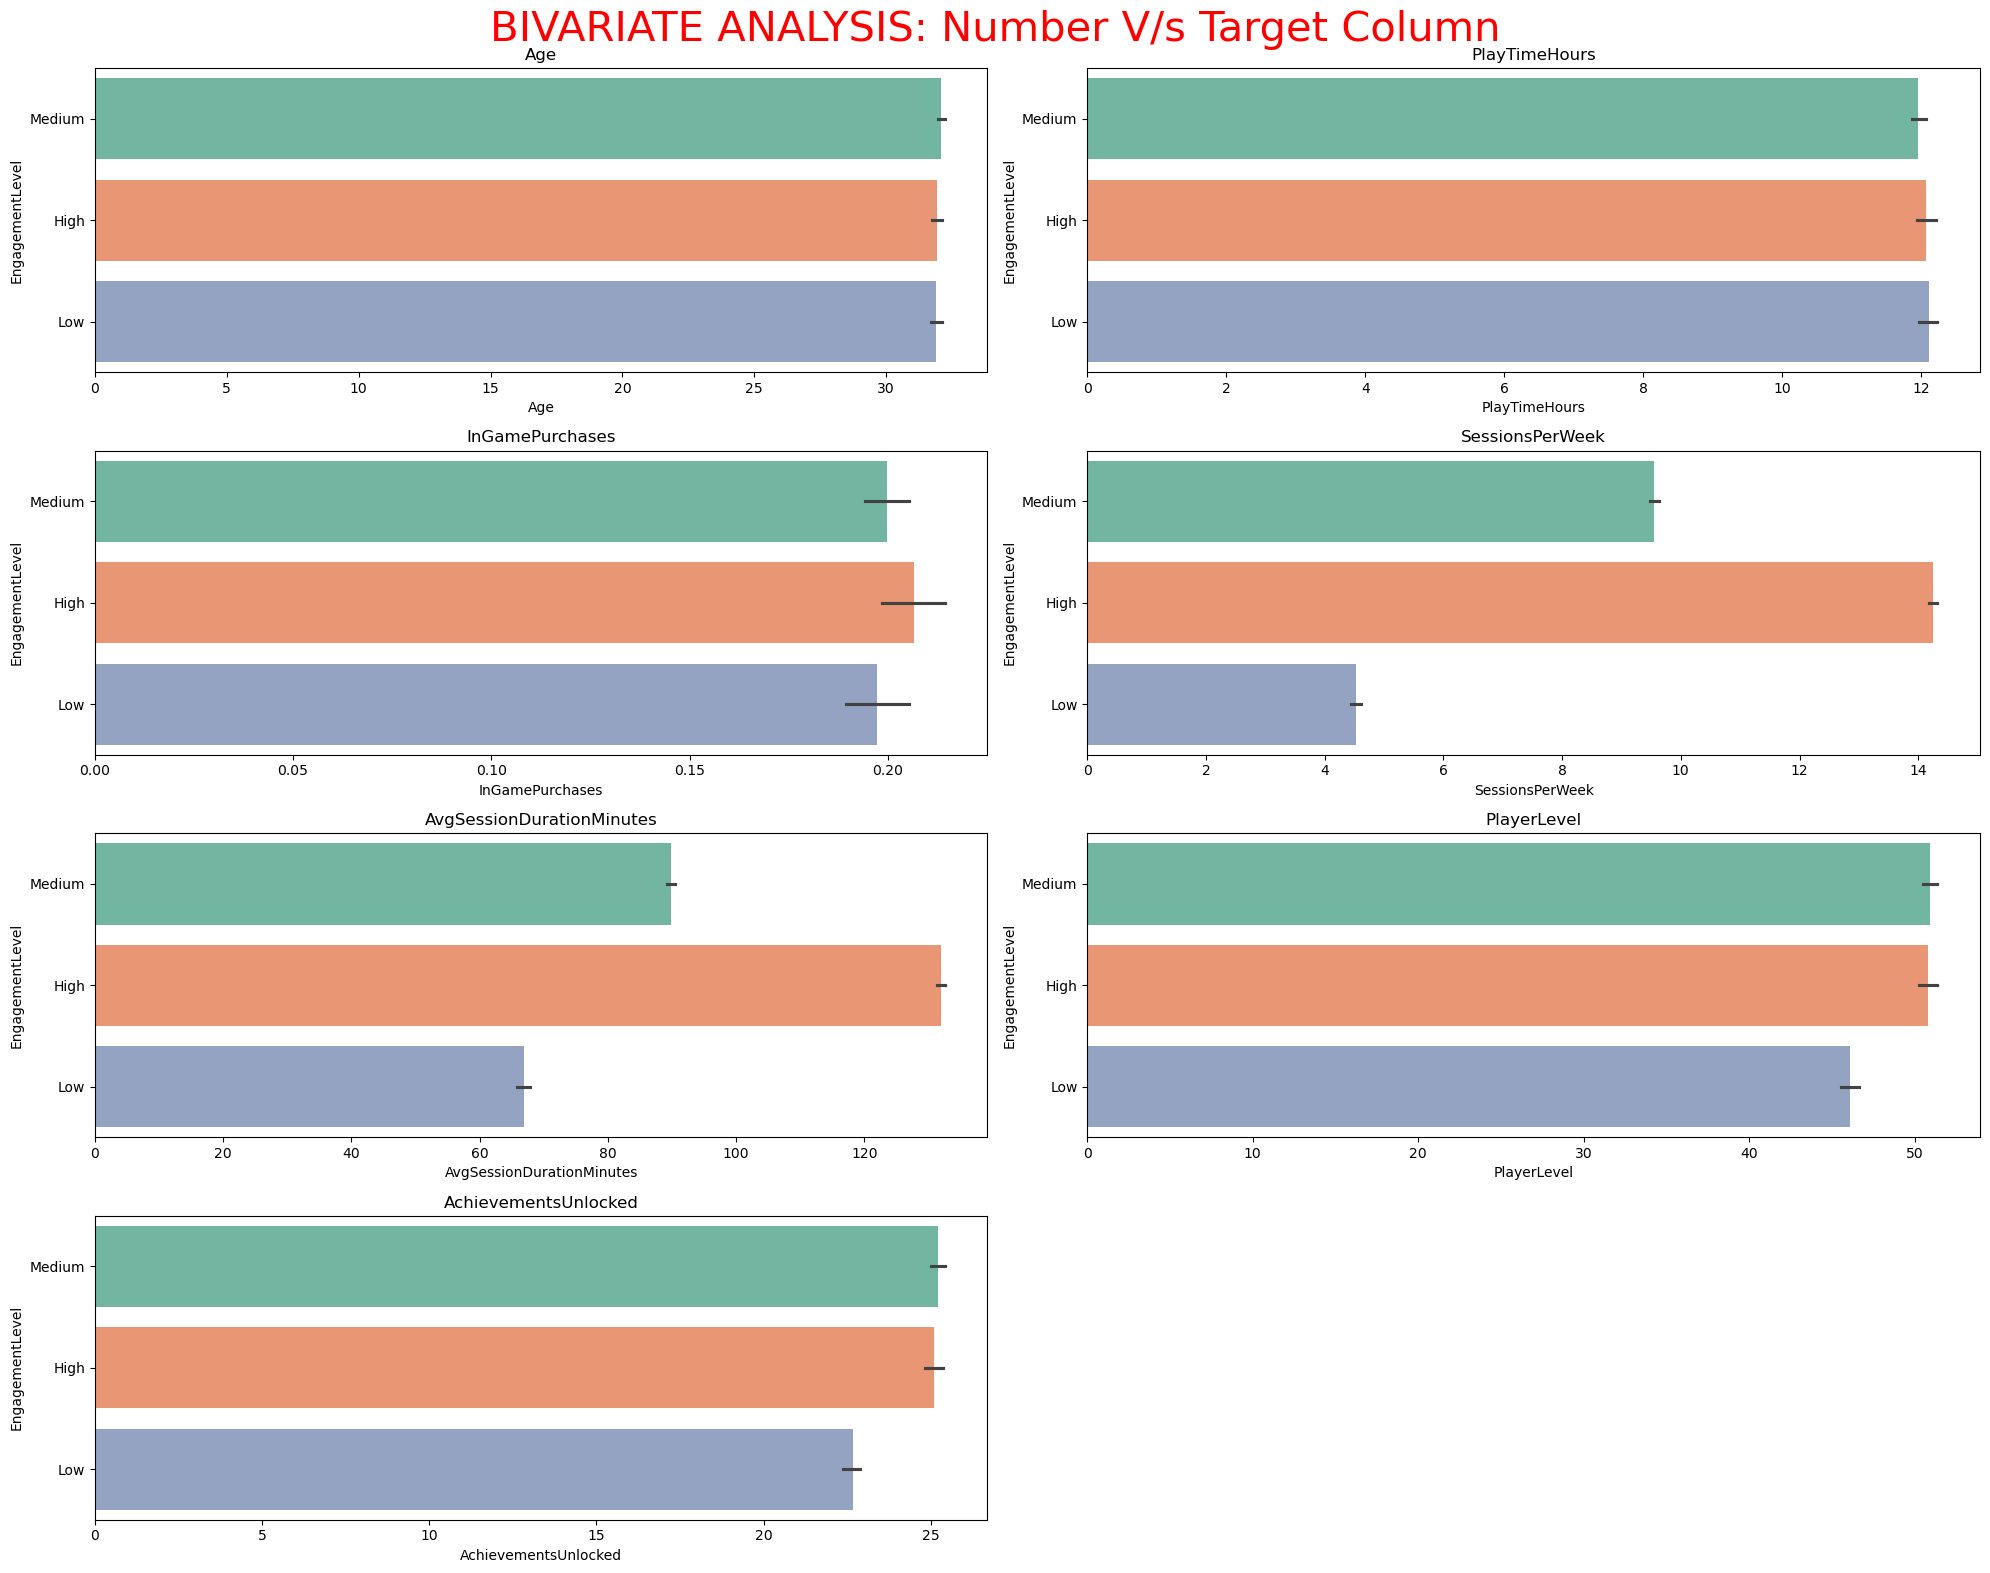

In [33]:
plt.figure(figsize= (20,16))
plt.suptitle('BIVARIATE ANALYSIS: Number V/s Target Column',size=30, color='red')


t=1

for i in num_cols:
    plt.subplot(4,2,t)
    sns.barplot(game, x=i, y='EngagementLevel', palette='Set2')
    plt.title(f'{i}')
    t+=1
plt.tight_layout()
plt.show()

**INFERENCE**
* The average age of players is quite consistent across engagement levels, with no significant variation. This suggests that age may not be a strong differentiator for engagement levels in this dataset.

* The percentage of players making in-game purchases is relatively similar across all engagement levels, indicating that purchase behavior does not significantly differ based on how engaged players are.

* There is a clear trend showing that higher engagement correlates with more frequent gaming sessions per week. High-engagement players are almost three times more active than low-engagement players.

* Players with high engagement have significantly longer average session durations compared to those with medium and low engagement levels.

* Player levels are relatively consistent across high and medium engagement levels but drop for low engagement players, indicating that more engaged players tend to progress further in the game.

* Players with medium and high engagement unlock a similar number of achievements on average compared to those with low engagement who unlock fewer achievements.

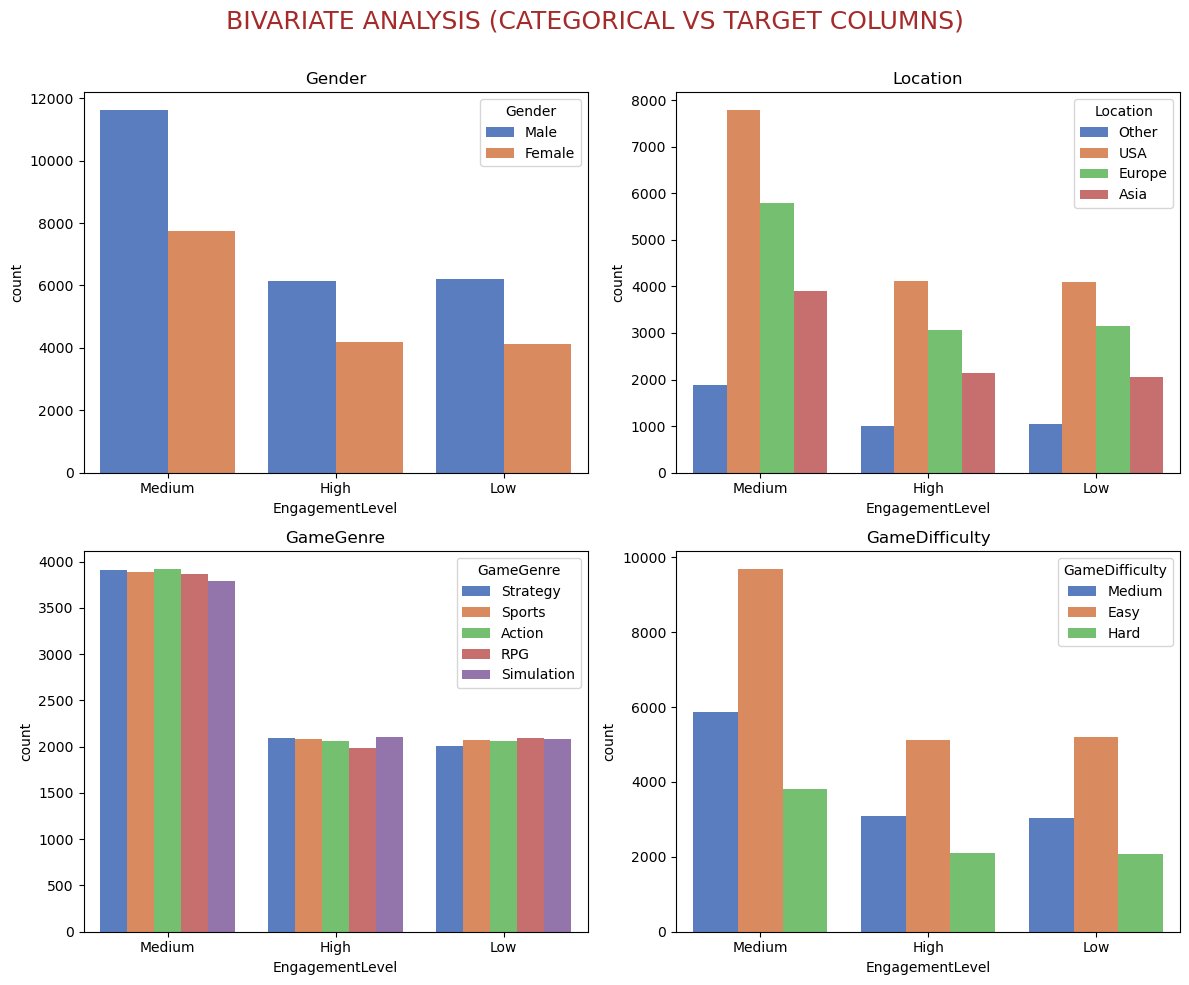

In [34]:
t=1
plt.figure(figsize=(12,10))
plt.suptitle('BIVARIATE ANALYSIS (CATEGORICAL VS TARGET COLUMNS)\n',color='brown',size=18)
for i in cat_cols:
    if i!='EngagementLevel':
        plt.subplot(2,2,t)
        sns.countplot(data=game,x='EngagementLevel',hue=i,palette='muted')
        plt.title(f'{i}')
        t+=1

plt.tight_layout()
plt.show()

**INFERENCES**

* Medium engagement is the most common for both genders, with males having a slightly higher percentage than females.
Females have a slightly lower proportion of High and Low engagement as compared to males.

* The USA leads in total player counts across all engagement levels, with a strong proportion of medium engagement

* RPGs have the highest low engagement, suggesting room for improvement in retaining players at higher engagement levels.
  Simulation games have the highest proportion of high engagement.

* Easy difficulty has the highest engagement for all 3 types of engagement.

### MULTIVARIATE ANALYSIS

<Axes: >

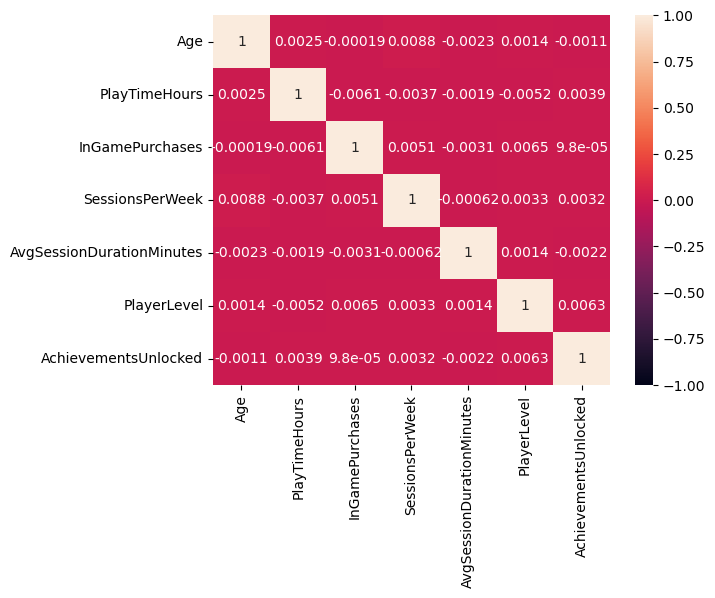

In [35]:
sns.heatmap(game.corr(numeric_only=True), vmin=-1, annot=True)

**INFERENCE**
* Most features have near-zero correlations with each other, indicating that individual metrics like PlayTimeHours, InGamePurchases, and SessionsPerWeek may operate independently.
Player behavior seems influenced by a combination of factors rather than any single metric.

In [36]:
game['Gender'] = game['Gender'].map({'Male': 0, 'Female': 1})

engagement_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
game['EngagementLevel'] = game['EngagementLevel'].map(engagement_mapping)

difficulty_mapping = {'Easy': 1, 'Medium': 2, 'Hard': 3}
game['GameDifficulty'] = game['GameDifficulty'].map(difficulty_mapping)

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
le= LabelEncoder()
game['Location']= le.fit_transform(game['Location'])

In [43]:
game['GameGenre']= le.fit_transform(game['GameGenre'])